In [1]:
# Import libraries
import itertools 
from youtube_comment_downloader import * #you can find out more about this library here Tutorial: https://github.com/egbertbouman/youtube-comment-downloader
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#NLP packages
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import nltk

In [3]:
# Test download comments from a Youtube link
downloader = YoutubeCommentDownloader()
comments = downloader.get_comments_from_url('https://www.youtube.com/watch?v=IVK5vQg1UvY', sort_by=SORT_BY_POPULAR)
# This is a video from about a year old.

# empty data frame
comment_df = pd.DataFrame()

# show first 10 comments by getting the first 10th items from generator object
comments_top10 = itertools.islice(comments, 10)

# convert generator object to pd.dataframe
comments_top10df= pd.DataFrame(comments_top10)

In [4]:
# Func to count # of comments for this video 
def ilen(it):
    return len(list(it))

ilen(comments)

115

In [5]:
comments_top10df

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed
0,UgwOGO46MBxyE9BXP4d4AaABAg,Skip to 41 min for the non-conventional juicy ...,1 month ago,@rustbeltinvestor,UCE4zE_Nv_iYzkHBqe4PJZ5g,36,https://yt3.ggpht.com/4pyKcTh0cMYdvRC7792-RGxz...,False,False,1.702779e+09
1,UgyB3rb4Ekkl6wijZhB4AaABAg,Thanks for having me on BP! This is a very im...,1 month ago,@RentToRetirement,UC_h1lnz1kM75Gj79VV8QtEg,48,https://yt3.ggpht.com/4r48relcULJPr61jgu7Vckc0...,True,False,1.702779e+09
2,Ugzd-7F_b7tHj0ag-9p4AaABAg,Great Video! I had a really funny laugh when y...,1 month ago,@bernardbarbour,UCpno4ZucXr76sZlri-KlxoQ,7,https://yt3.ggpht.com/ytc/AIf8zZQj_z9ZN0oWmuzs...,False,False,1.702779e+09
3,UgzIM4T3cUW82ezfsu94AaABAg,This was a gold mine video. Thanks David for b...,1 month ago,@user-ze9nk8to5j,UC37Souaem4pXCZp2iVdloEQ,2,https://yt3.ggpht.com/ytc/AIf8zZQzK1ArhZAGAbF-...,False,False,1.702779e+09
4,Ugy3RwRHfxA_B8XJWX94AaABAg,Great information! Loved how you explained the...,1 month ago,@thegrantmyles,UC_uyscgHzjwgvx1yC4NTYiA,4,https://yt3.ggpht.com/ytc/AIf8zZTX2cctY5R9Jx_K...,False,False,1.702779e+09
5,UgwvAyq6OTiqKrua61t4AaABAg,Any time you can find creative financing optio...,1 month ago,@AdamSchroederPresents,UCVk8vXR_6aV-EtuvVMaBARQ,4,https://yt3.ggpht.com/ytc/AIf8zZRCGYx-vu3pGfrF...,False,False,1.702779e+09
6,UgzJ4kzgNr2pRiJCDu94AaABAg,"I just started my finance degree, first year i...",4 weeks ago,@willycampos9813,UCoh_jH9jcvWzUDUPVLQ1QcQ,0,https://yt3.ggpht.com/ytc/AIf8zZSccwW4-l2xF_zU...,False,False,1.703038e+09
7,Ugw28X57vSaK8I6fQR54AaABAg,Absolutely fire content about loan products we...,1 month ago,@priorityhomes2988,UCnUtUyHpYv4YNw5RKIIxy2Q,8,https://yt3.ggpht.com/WlofFRll1jmFRiCwkR9vieD6...,False,False,1.702779e+09
8,UgzZF0nVrkGdRXA1Hx14AaABAg,100% I feel for every new-ish investor’s “to b...,1 month ago,@patricksquires6348,UCfB3quSNrWgB2bQkZc3e2Zg,2,https://yt3.ggpht.com/ytc/AIf8zZSjYJskizVJgU1d...,False,False,1.702779e+09
9,UgxCVn6oe9qQMna9awt4AaABAg,"Rob, you should be signing leases for yourself...",1 month ago,@WOZlicious,UC9twtUn96vdpe8BeyXMHzaA,0,https://yt3.ggpht.com/ytc/AIf8zZQgW285zMJG4XJO...,False,False,1.702779e+09


In [6]:
# The first 500 comments
comments = downloader.get_comments_from_url('https://www.youtube.com/watch?v=IVK5vQg1UvY', sort_by=SORT_BY_POPULAR)

comments_top500 = itertools.islice(comments, 500)
comments_top500df= pd.DataFrame(comments_top500)

In [7]:
comments_top500df.head()

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed
0,UgwOGO46MBxyE9BXP4d4AaABAg,Skip to 41 min for the non-conventional juicy ...,1 month ago,@rustbeltinvestor,UCE4zE_Nv_iYzkHBqe4PJZ5g,36,https://yt3.ggpht.com/4pyKcTh0cMYdvRC7792-RGxz...,False,False,1.702779e+09
1,UgyB3rb4Ekkl6wijZhB4AaABAg,Thanks for having me on BP! This is a very im...,1 month ago,@RentToRetirement,UC_h1lnz1kM75Gj79VV8QtEg,48,https://yt3.ggpht.com/4r48relcULJPr61jgu7Vckc0...,True,False,1.702779e+09
2,Ugzd-7F_b7tHj0ag-9p4AaABAg,Great Video! I had a really funny laugh when y...,1 month ago,@bernardbarbour,UCpno4ZucXr76sZlri-KlxoQ,7,https://yt3.ggpht.com/ytc/AIf8zZQj_z9ZN0oWmuzs...,False,False,1.702779e+09
3,UgzIM4T3cUW82ezfsu94AaABAg,This was a gold mine video. Thanks David for b...,1 month ago,@user-ze9nk8to5j,UC37Souaem4pXCZp2iVdloEQ,2,https://yt3.ggpht.com/ytc/AIf8zZQzK1ArhZAGAbF-...,False,False,1.702779e+09
4,Ugy3RwRHfxA_B8XJWX94AaABAg,Great information! Loved how you explained the...,1 month ago,@thegrantmyles,UC_uyscgHzjwgvx1yC4NTYiA,4,https://yt3.ggpht.com/ytc/AIf8zZTX2cctY5R9Jx_K...,False,False,1.702779e+09


In [8]:
# Save comments to CSV file 
comments_top500df.to_csv("02_Results/bp_IVK5vQg1UvY_ytb500.csv")

In [ ]:
# Read back in
# comments_top500df = pd.read_csv("02_Results/bp_IVK5vQg1UvY_ytb500.csv")

In [9]:
### CLEAN DATA ###

In [12]:
import warnings
warnings.filterwarnings('ignore')

# remove punctuation:
comments_top500df['text'] = comments_top500df['text'].str.replace('[^\w\s]','')
comments_top500df['text'].head()

0    Skip to 41 min for the nonconventional juicy s...
1    Thanks for having me on BP  This is a very imp...
2    Great Video I had a really funny laugh when yo...
3    This was a gold mine video Thanks David for be...
4    Great information Loved how you explained the ...
Name: text, dtype: object

In [13]:
# remove any emojis :(
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

comments_top500df['text'] = comments_top500df['text'].apply(lambda x: remove_emoji(x))
comments_top500df['text'].head()

0    Skip to 41 min for the nonconventional juicy s...
1    Thanks for having me on BP  This is a very imp...
2    Great Video I had a really funny laugh when yo...
3    This was a gold mine video Thanks David for be...
4    Great information Loved how you explained the ...
Name: text, dtype: object

In [15]:
# Remove stopwords - commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence 
nltk.download('stopwords')

stop = stopwords.words('english')
comments_top500df['text'] = comments_top500df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
comments_top500df['text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

0              Skip 41 min nonconventional juicy stuff
1    Thanks BP This important topic cover many us f...
2    Great Video I really funny laugh guys talked R...
3    This gold mine video Thanks David honest chall...
4    Great information Loved explained benefits pur...
Name: text, dtype: object

In [20]:
# Lemmatization using Spacy so that we can count the appearance of each word.

#initialize Spacy ‘en’ model, keeping only the component need for lemmatization and creating an engine:
# need to download the model in cmd by: spacy download en_core_web_sm 

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

comments_top500df['text'] = comments_top500df['text'].apply(space)
comments_top500df['text'].head()

0              skip 41 min nonconventional juicy stuff
1    thank bp this important topic cover many we fe...
2    Great Video I really funny laugh guy talk Rock...
3    this gold mine video thank David honest challe...
4    great information Loved explain benefit purcha...
Name: text, dtype: object

In [21]:
# remove textless rows  
comments_top500df['text'].replace('', np.nan, inplace=True)
comments_top500df.dropna(subset=['text'], inplace=True)
comments_top500df.shape # 125 rows 

(125, 10)

In [22]:
# Save updated comments to CSV file 
comments_top500df.to_csv("02_Results/bp_IVK5vQg1UvY_ytb500.csv")

In [23]:
# Read back in
# comments_top500df = pd.read_csv("02_Results/bp_IVK5vQg1UvY_ytb500.csv")

In [24]:
### WORDCLOUD VIZ ###
# See: https://www.geeksforgeeks.org/generating-word-cloud-python/

(-0.5, 799.5, 799.5, -0.5)

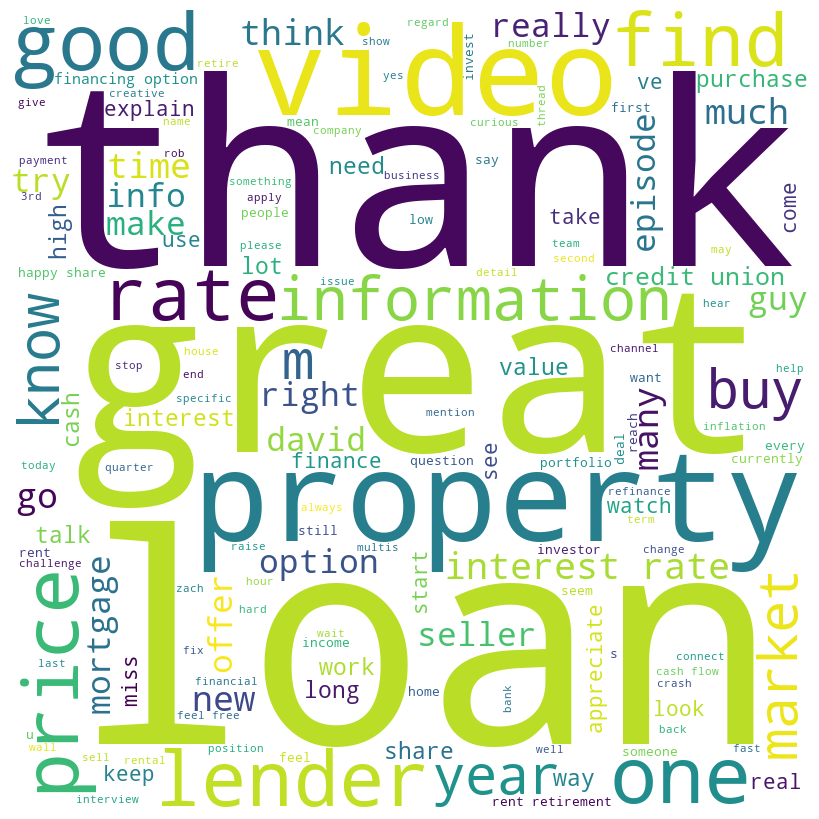

In [25]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in comments_top500df['text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image   
beingsaved = plt.figure(figsize = (8, 8), facecolor = None)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [26]:
# save high resolution figure
beingsaved.savefig('02_Results/Video_highest_polarityindex_comments_wordcloud.eps', format='eps', dpi=1000)

In [27]:
### 4. Sentiment analysis $$$
# https://www.kaggle.com/code/adepvenugopal/sentiment-analysis-of-youtube-comments

In [28]:
#Testing NLP - Sentiment Analysis using TextBlob
testsent= TextBlob("The movie is good").sentiment

testsent
# To interpret the result:
# TextBlob’s output for a polarity task is a float within the range [-1.0, 1.0] where -1.0 is a negative polarity and 1.0 is positive. This score can also be equal to 0, which stands for a neutral evaluation of a statement as it doesn’t contain any words from the training set.
# Whereas, a subjectivity/objectivity identification task reports a float within the range [0.0, 1.0] 

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [29]:
#Testing NLP - Sentiment Analysis using one of the video comments
comments_top500df['text'][1]

TextBlob(comments_top500df['text'][1]).sentiment

'thank bp this important topic cover many we feel stuck high interest rate dynamic lending world hopefully cover today show still many excellent loan option available you need know find I hope educational everyone I m always answer question'

Sentiment(polarity=0.40125, subjectivity=0.5445833333333333)

In [30]:
# Calculating Sentiment polarity for each comment

pol=[] # list which will contain the polarity of the comments
for i in comments_top500df['text']:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)
        
# adding polarity to df
comments_top500df['polarity']=pol
comments_top500df.head()

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,polarity
0,UgwOGO46MBxyE9BXP4d4AaABAg,skip 41 min nonconventional juicy stuff,1 month ago,@rustbeltinvestor,UCE4zE_Nv_iYzkHBqe4PJZ5g,36,https://yt3.ggpht.com/4pyKcTh0cMYdvRC7792-RGxz...,False,False,1.702779e+09,0.000000
1,UgyB3rb4Ekkl6wijZhB4AaABAg,thank bp this important topic cover many we fe...,1 month ago,@RentToRetirement,UC_h1lnz1kM75Gj79VV8QtEg,48,https://yt3.ggpht.com/4r48relcULJPr61jgu7Vckc0...,True,False,1.702779e+09,0.401250
2,Ugzd-7F_b7tHj0ag-9p4AaABAg,Great Video I really funny laugh guy talk Rock...,1 month ago,@bernardbarbour,UCpno4ZucXr76sZlri-KlxoQ,7,https://yt3.ggpht.com/ytc/AIf8zZQj_z9ZN0oWmuzs...,False,False,1.702779e+09,0.341077
3,UgzIM4T3cUW82ezfsu94AaABAg,this gold mine video thank David honest challe...,1 month ago,@user-ze9nk8to5j,UC37Souaem4pXCZp2iVdloEQ,2,https://yt3.ggpht.com/ytc/AIf8zZQzK1ArhZAGAbF-...,False,False,1.702779e+09,0.275000
4,Ugy3RwRHfxA_B8XJWX94AaABAg,great information Loved explain benefit purcha...,1 month ago,@thegrantmyles,UC_uyscgHzjwgvx1yC4NTYiA,4,https://yt3.ggpht.com/ytc/AIf8zZTX2cctY5R9Jx_K...,False,False,1.702779e+09,0.390000


In [31]:
comments_top500df.tail()
# just check the tail 

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,polarity
120,UgwwPZJG3BEnBJ4iqRt4AaABAg.9xQk4jkhCl_9xTN8ImhLtY,hair surrogate,1 month ago,@priorityhomes2988,UCnUtUyHpYv4YNw5RKIIxy2Q,0,https://yt3.ggpht.com/WlofFRll1jmFRiCwkR9vieD6...,False,True,1.702779e+09,0.000000
121,UgyWsH_ryt56ue_9ExJ4AaABAg.9xsUhtGJo4s9xzZN9HU0OF,podcast publicly available major platform,1 month ago,@RentToRetirement,UC_h1lnz1kM75Gj79VV8QtEg,0,https://yt3.ggpht.com/4r48relcULJPr61jgu7Vckc0...,False,True,1.702779e+09,0.231250
122,Ugxof6u8Tymlz6apu-x4AaABAg.9xUFRRGVhkY9xYQhq9dH2g,would argue fix rate mortgage 30 year high int...,1 month ago,@priorityhomes2988,UCnUtUyHpYv4YNw5RKIIxy2Q,0,https://yt3.ggpht.com/WlofFRll1jmFRiCwkR9vieD6...,False,True,1.702779e+09,0.279143
123,Ugxof6u8Tymlz6apu-x4AaABAg.9xUFRRGVhkY9xjhouJ9_6f,priorityhomes2988 I think know person parrot h...,1 month ago,@GY6SCOOTERCHAT,UCqaetarRK4eJTEWXXWZFFSA,0,https://yt3.ggpht.com/p4SBajO-jXIyh3dXvWUA0wz7...,False,True,1.702779e+09,-0.100000
124,Ugxx0cydTAePh1F0VSR4AaABAg.9xZ99QhlNV-9xjgoDZqRdM,yea amateur hour video just long advertisement...,1 month ago,@GY6SCOOTERCHAT,UCqaetarRK4eJTEWXXWZFFSA,1,https://yt3.ggpht.com/p4SBajO-jXIyh3dXvWUA0wz7...,False,True,1.702779e+09,-0.150000


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  2.,
         2.,  2.,  0.,  0., 37.,  1.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,
         0.,  3.,  2.,  2.,  1., 11.,  0.,  2.,  3.,  1.,  2.,  0.,  2.,
         0.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,
         4.,  0.,  1.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  1.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.44  , -0.4256, -0.4112, -0.3968, -0.3824, -0.368 , -0.3536,
        -0.3392, -0.3248, -0.3104, -0.296 , -0.2816, -0.2672, -0.2528,
        -0.2384, -0.224 , -0.2096, -0.1952, -0.1808, -0.1664, -0.152 ,
        -0.1376, -0.1232, -0.1088, -0.0944, -0.08  , -0.0656, -0.0512,
        -0.0368, -0.0224, -0.008 ,  0.0064,  0.0208,  0.0352,  0.0496,
         0.064 ,  0.0784,  0.0928,  0.1072,  0.1216,  0.136 ,  0.1504,
        

[Text(0.5, 1.0, 'Comment Polarity Histogram'), Text(0, 0.5, 'Frequency')]

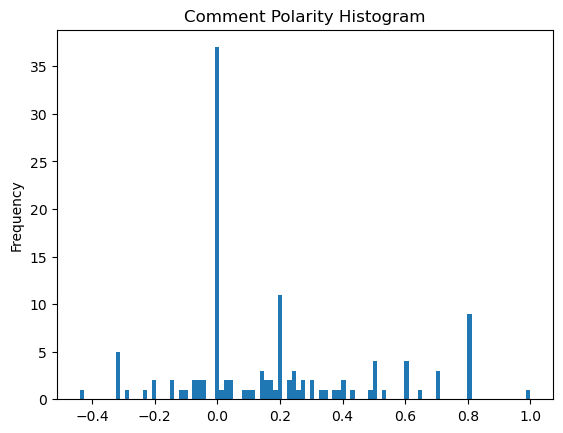

In [32]:
# Make plot of polarity 
plt.hist(comments_top500df['polarity'], bins=100)
plt.gca().set(title='Comment Polarity Histogram', ylabel='Frequency')

In [33]:
# get summary statistics 
comments_top500df['polarity'].describe()

count    125.000000
mean       0.173939
std        0.300626
min       -0.440000
25%        0.000000
50%        0.083333
75%        0.300000
max        1.000000
Name: polarity, dtype: float64